In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
df_2015 = pd.read_csv('../Data/EPA-data-2015.csv')
df_2016 = pd.read_csv('../Data/EPA-data-2016.csv')

/var/folders/fg/q9vq8s1s467df4k3plvy57b00000gn/T/ipykernel_52511/3565653288.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 = pd.read_csv('../Data/EPA-data-2016.csv')


## 1.Comparing the 2015 data with 2016 data: 

### a. Have the overall missing values in the EPA data increased or decreased between 2015 and 2016?

In [4]:
missing_2015 = df_2015.isnull().sum().sum()
missing_2016 = df_2016.isnull().sum().sum()

if missing_2015 > missing_2016:
    print("The overall missing values decreased from 2015 to 2016.")
elif missing_2015 < missing_2016:
    print("The overall missing values increased from 2015 to 2016.")
else:
    print("The overall missing values remained the same from 2015 to 2016.")

The overall missing values decreased from 2015 to 2016.


### b.List the states for which the missing values in the data have increased and the states for which the missing values in the data have decreased.

In [10]:
missing_by_state_2015 = df_2015.groupby('State Name').apply(lambda x: x.isnull().sum().sum())
missing_by_state_2016 = df_2016.groupby('State Name').apply(lambda x: x.isnull().sum().sum())

difference_missing = missing_by_state_2016 - missing_by_state_2015

increased_missing_states = difference_missing[difference_missing > 0].index.tolist()
decreased_missing_states = difference_missing[difference_missing < 0].index.tolist()

(['Colorado',
  'Connecticut',
  'Kansas',
  'Massachusetts',
  'New Jersey',
  'South Carolina',
  'Utah',
  'West Virginia'],
 ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Delaware',
  'District Of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Puerto Rico',
  'Rhode Island',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Vermont',
  'Virginia',
  'Washington',
  'Wisconsin',
  'Wyoming'])

In [11]:
increased_missing_states

['Colorado',
 'Connecticut',
 'Kansas',
 'Massachusetts',
 'New Jersey',
 'South Carolina',
 'Utah',
 'West Virginia']

In [12]:
decreased_missing_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Delaware',
 'District Of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Vermont',
 'Virginia',
 'Washington',
 'Wisconsin',
 'Wyoming']

### c.Create a new Pandas dataframe with the following columns, populate the dataframe, and write it out as a CSV file: 

In [18]:
def calculate_missing_proportion(df):
    total_observations = df.groupby(['Year', 'Month', 'State Name', 'County Name']).size().reset_index(name='Total_Observations')

    missing_observations = df.groupby(['Year', 'Month', 'State Name', 'County Name']).apply(lambda x: x.isnull().sum().sum()).reset_index(name='Missing_Observations(%)')

    combined = pd.merge(total_observations, missing_observations, on=['Year', 'Month', 'State Name', 'County Name'])

    combined['Missing_Proportion(%)'] = combined['Missing_Observations(%)'] / combined['Total_Observations']
    
    return combined[['Year', 'Month', 'State Name', 'County Name', 'Missing_Proportion(%)']]

In [19]:
df_2015['Year'] = pd.to_datetime(df_2015['Date Local']).dt.year
df_2015['Month'] = pd.to_datetime(df_2015['Date Local']).dt.month

df_2016['Year'] = pd.to_datetime(df_2016['Date Local']).dt.year
df_2016['Month'] = pd.to_datetime(df_2016['Date Local']).dt.month


missing_proportion_2015 = calculate_missing_proportion(df_2015)
missing_proportion_2016 = calculate_missing_proportion(df_2016)

missing_proportion_combined = pd.concat([missing_proportion_2015, missing_proportion_2016])

missing_proportion_combined.to_csv('./missing_proportion_combined.csv', index=False)

## 2. Use “AQI” and “Arithmetic Mean” (of PM 2.5) as indicators of air quality to answer the following questions:

### a.On average, from 2015 to 2016 has pollution in the U.S. increased or decreased?

In [23]:
pm25_2015 = df_2015[df_2015['Parameter Name'] == 'PM2.5 - Local Conditions']
pm25_2016 = df_2016[df_2016['Parameter Name'] == 'PM2.5 - Local Conditions']

average_aqi_pm25_2015 = round(pm25_2015['AQI'].mean(),2)
average_aqi_pm25_2016 = round(pm25_2016['AQI'].mean(),2)
print('2015 pm2.5 AQI avage is:',average_aqi_pm25_2015)
print('2016 pm2.5 AQI avage is:',average_aqi_pm25_2016)

2015 pm2.5 AQI avage is: 33.35
2016 pm2.5 AQI avage is: 29.92


In [22]:
average_arithmetic_pm25_2015 = round(pm25_2015['Arithmetic Mean'].mean(),2)
average_arithmetic_pm25_2016 = round(pm25_2016['Arithmetic Mean'].mean(),2)

print('2015 pm2.5 Arithmetic avage is:',average_arithmetic_pm25_2015)
print('2015 pm2.5 Arithmetic avage is:',average_arithmetic_pm25_2016)

2015 pm2.5 Arithmetic avage is: 8.48
2015 pm2.5 Arithmetic avage is: 7.34


### b. Insert a column in the 2015 and 2016 dataframes and call it “AQI category.”

In [24]:
def categorize_aqi(aqi):
    if 0 < aqi <= 50:
        return 'Good'
    elif 50 < aqi <= 100:
        return 'Moderate'
    elif 100 < aqi <= 150:
        return 'Unhealthy-sensitive'
    elif 150 < aqi <= 200:
        return 'Unhealthy'
    elif 200 < aqi <= 300:
        return 'Very unhealthy'
    else:
        return 'Hazardous'

In [29]:
df_2015['AQI category'] = df_2015['AQI'].apply(categorize_aqi)
df_2016['AQI category'] = df_2016['AQI'].apply(categorize_aqi)

In [30]:
df_2015[['AQI', 'AQI category']].head()

,AQI,AQI category
0,28.0,Good
1,48.0,Good
2,55.0,Moderate
3,41.0,Good
4,26.0,Good


In [31]:
df_2016[['AQI', 'AQI category']].head()

,AQI,AQI category
0,33.0,Good
1,22.0,Good
2,28.0,Good
3,13.0,Good
4,36.0,Good


### c. When AQI levels are in the 0-50 range, air quality is considered as “Good.” How many days did Pittsburgh not meet the good air quality standard in 2015? How about in 2016?

In [34]:
pittsburgh_2015 = df_2015[(df_2015['City Name'] == 'Pittsburgh') & (df_2015['Parameter Name'] == 'PM2.5 - Local Conditions')]
pittsburgh_2016 = df_2016[(df_2016['City Name'] == 'Pittsburgh') & (df_2016['Parameter Name'] == 'PM2.5 - Local Conditions')]

pittsburgh_not_good_2015 = pittsburgh_2015[pittsburgh_2015['AQI'] > 50]['Date Local'].nunique()
pittsburgh_not_good_2016 = pittsburgh_2016[pittsburgh_2016['AQI'] > 50]['Date Local'].nunique()

In [35]:
pittsburgh_not_good_2015

95

In [36]:
pittsburgh_not_good_2016

86

### d. Compare and comment on the air quality levels between Pittsburgh and Philadelphia.

In [37]:
def air_quality_city(df, city_name):
    city_data = df[(df['City Name'] == city_name) & (df['Parameter Name'] == 'PM2.5 - Local Conditions')]
    
    average_aqi = city_data['AQI'].mean()
    
    average_arithmetic_mean = city_data['Arithmetic Mean'].mean()
    
    return average_aqi, average_arithmetic_mean

In [44]:
pittsburgh_aqi_2015, pittsburgh_arithmetic_mean_2015 = air_quality_city(df_2015, 'Pittsburgh')
philadelphia_aqi_2015, philadelphia_arithmetic_mean_2015 = air_quality_city(df_2015, 'Philadelphia')

pittsburgh_aqi_2016, pittsburgh_arithmetic_mean_2016 = air_quality_city(df_2016, 'Pittsburgh')
philadelphia_aqi_2016, philadelphia_arithmetic_mean_2016 = air_quality_city(df_2016, 'Philadelphia')

In [64]:
print('Pittsburgh API in 2015 is:',round(pittsburgh_aqi_2015,2))
print('Philadelphia API in 2015 is:',round(philadelphia_aqi_2015,2))

Pittsburgh API in 2015 is: 36.81
Philadelphia API in 2015 is: 41.08


In [63]:
print('Pittsburgh API in 2016 is:',round(pittsburgh_aqi_2016,2))
print('Philadelphia API in 2016 is:',round(philadelphia_aqi_2016,2))

Pittsburgh API in 2016 is: 39.81
Philadelphia API in 2016 is: 36.0


In [62]:
print('Pittsburgh Arithmetic in 2015 is:', round(pittsburgh_arithmetic_mean_2015,2))
print('Philadelphia Arithmetic in 2015 is:', round(philadelphia_arithmetic_mean_2015,2))

Pittsburgh Arithmetic in 2015 is: 9.32
Philadelphia Arithmetic in 2015 is: 10.65


In [61]:
print('Pittsburgh Arithmetic in 2016 is:', round(pittsburgh_arithmetic_mean_2016,2))
print('Philadelphia Arithmetic in 2016 is:', round(philadelphia_arithmetic_mean_2016,2))

Pittsburgh Arithmetic in 2016 is: 10.22
Philadelphia Arithmetic in 2016 is: 9.07


**Pittsburgh's API and Arithmetic numbers were up from 2015 to 2016. But Philadelphia's data instead declined. This means Philadelphia has better control over air quality optimization and pm2.5.**

### e.In 2015 and 2016, on the days when Pittsburgh did not have good air quality, did Philadelphia have good air quality?

In [49]:
pittsburgh_bad_days_2015 = pittsburgh_2015[pittsburgh_2015['AQI'] > 50]['Date Local'].unique()
pittsburgh_bad_days_2016 = pittsburgh_2016[pittsburgh_2016['AQI'] > 50]['Date Local'].unique()

philadelphia_2015 = df_2015[(df_2015['City Name'] == 'Philadelphia') & (df_2015['Parameter Name'] == 'PM2.5 - Local Conditions')]
philadelphia_2016 = df_2016[(df_2016['City Name'] == 'Philadelphia') & (df_2016['Parameter Name'] == 'PM2.5 - Local Conditions')]

In [50]:
philadelphia_good_on_pittsburgh_bad_days_2015 = philadelphia_2015[philadelphia_2015['Date Local'].isin(pittsburgh_bad_days_2015) & (philadelphia_2015['AQI'] <= 50)]
philadelphia_good_on_pittsburgh_bad_days_2016 = philadelphia_2016[philadelphia_2016['Date Local'].isin(pittsburgh_bad_days_2016) & (philadelphia_2016['AQI'] <= 50)]

philadelphia_good_count_2015 = philadelphia_good_on_pittsburgh_bad_days_2015['Date Local'].nunique()
philadelphia_good_count_2016 = philadelphia_good_on_pittsburgh_bad_days_2016['Date Local'].nunique()

In [51]:
philadelphia_good_count_2015

50

In [52]:
philadelphia_good_count_2016

75

**50 days in 2015 and 75 days in 2016**

### f.If you rank order the U.S. cities featured in the datasets according to air quality, where does Pittsburgh feature in 2015 and 2016? Provide the absolute rank and also the rank in percentile terms.

In [53]:
def rank_cities_by_aqi(df, year):

    city_aqi = df[df['Year'] == year].groupby('City Name')['AQI'].mean().sort_values()

    pittsburgh_rank = city_aqi.index.get_loc('Pittsburgh') + 1

    pittsburgh_percentile = (pittsburgh_rank / len(city_aqi)) * 100
    
    return city_aqi, pittsburgh_rank, pittsburgh_percentile

In [54]:
city_aqi_2015, pittsburgh_rank_2015, pittsburgh_percentile_2015 = rank_cities_by_aqi(df_2015, 2015)
city_aqi_2016, pittsburgh_rank_2016, pittsburgh_percentile_2016 = rank_cities_by_aqi(df_2016, 2016)

In [56]:
print("In 2015, Pittsburgh's air quality ranking was:",pittsburgh_rank_2015)

In 2015, Pittsburgh's air quality ranking was: 480


In [59]:
print("In 2015, the percentage of Pittsburgh's ranking was:",round(pittsburgh_percentile_2015,2),'%')

In 2015, the percentage of Pittsburgh's ranking was: 72.73 %


In [57]:
print("In 2016, Pittsburgh's air quality ranking was:",pittsburgh_rank_2016)

In 2016, Pittsburgh's air quality ranking was: 605


In [60]:
print("In 2016, the percentage of Pittsburgh's ranking was:",round(pittsburgh_percentile_2016,2),'%')

In 2016, the percentage of Pittsburgh's ranking was: 93.51 %


## 3.Use the “Event Type” variable in the dataset to answer the following questions:

### a.Create an indicator (or dummy) variable in the datasets and name it “eventdummy”; eventdummy should be set to 0 if Event Type=”None”, else it should be set as 1. 

In [13]:
df_2015['eventdummy'] = df_2015.apply(lambda row: 1 if pd.notna(row['Event Type']) else 0, axis=1)

In [14]:
df_2016['eventdummy'] = df_2016.apply(lambda row: 1 if pd.notna(row['Event Type']) else 0, axis=1)

In [113]:
df_2015.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'Year', 'Month', 'AQI category',
       'eventdummy', 'Region'],
      dtype='object')

### b.Using the eventdummy variable, find out if at any given “Local Site” air quality is impacted by the events that the site experiences. Group the states into commonly known regions of the U.S. [ For example, this Wikipedia page lists the different U.S. regions considered in the U.S. Census: https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States ], and see if there is variation in your finding across the different regions.

In [23]:
df_2015['State Name'].unique().tolist()

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District Of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Puerto Rico',
 'Virgin Islands']

In [24]:
Northeast_List =  ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
Midwest_List = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South_List = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
West_List = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [25]:
conditions = [
    df_2015['State Name'].isin(Northeast_List),
    df_2015['State Name'].isin(Midwest_List),
    df_2015['State Name'].isin(South_List),
    df_2015['State Name'].isin(West_List)
]


choices = ['Northeast', 'Midwest', 'South', 'West']


df_2015['Region'] = np.select(conditions, choices, default=np.nan)

In [26]:
conditions = [
    df_2016['State Name'].isin(Northeast_List),
    df_2016['State Name'].isin(Midwest_List),
    df_2016['State Name'].isin(South_List),
    df_2016['State Name'].isin(West_List)
]


choices = ['Northeast', 'Midwest', 'South', 'West']


df_2016['Region'] = np.select(conditions, choices, default=np.nan)

In [27]:
impact_by_region_2015 = df_2015.groupby('Region')['eventdummy'].mean().reset_index()
impact_by_region_2016 = df_2016.groupby('Region')['eventdummy'].mean().reset_index()

In [28]:
impact_by_region_2015.head()

,Region,eventdummy
0,Midwest,0.158534
1,Northeast,0.000015
2,South,0.065716
3,West,0.076746
4,nan,0.000000


In [29]:
impact_by_region_2016.head()

,Region,eventdummy
0,Midwest,0.167644
1,Northeast,0.000018
2,South,0.075099
3,West,0.074324
4,nan,0.000000


## 4.Comment on the presence of outliers in the data. 

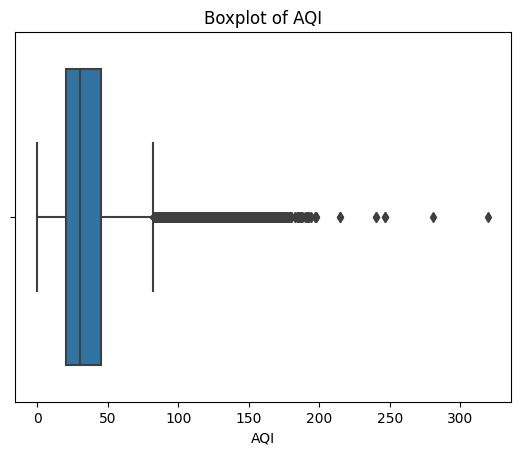

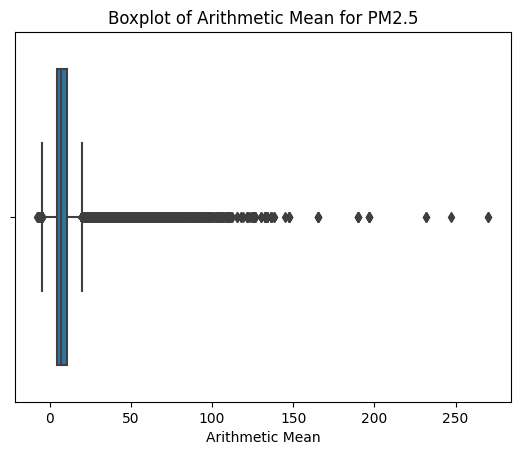

In [82]:
sns.boxplot(x=df_2015['AQI'])
plt.title('Boxplot of AQI')
plt.show()

sns.boxplot(x=df_2015['Arithmetic Mean'])
plt.title('Boxplot of Arithmetic Mean for PM2.5')
plt.show()

**Outliers in both AQI and Arithmetic in 2015 data**

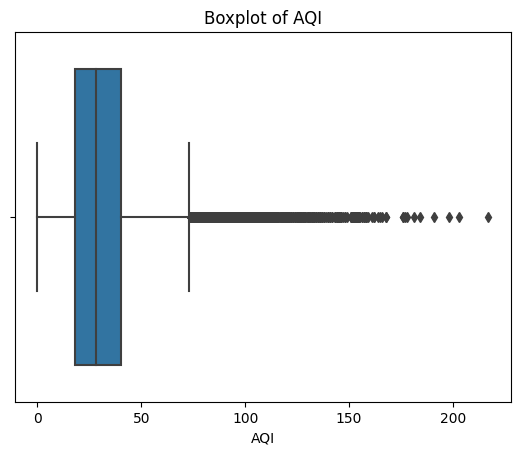

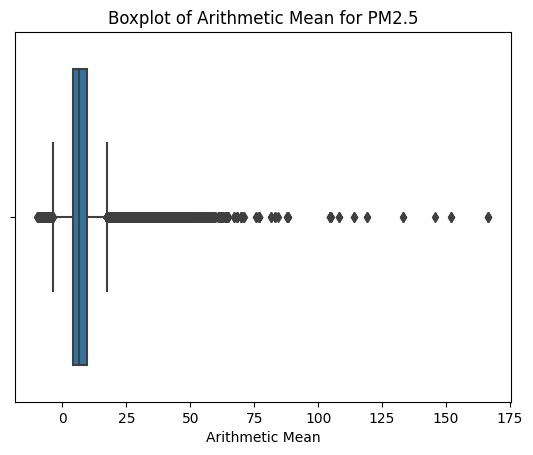

In [83]:
sns.boxplot(x=df_2016['AQI'])
plt.title('Boxplot of AQI')
plt.show()

sns.boxplot(x=df_2016['Arithmetic Mean'])
plt.title('Boxplot of Arithmetic Mean for PM2.5')
plt.show()

**Outliers in both AQI and Arithmetic in 2016 data**

## 5.Combine the two datasets and then create the following

### a.A new variable that is a combination of “State Code” and “County Name”; call it “state-county.” 

In [86]:
combined_df = pd.concat([df_2015, df_2016])

combined_df['state-county'] = combined_df['State Code'].astype(str) + "-" + combined_df['County Name']

### b.Create a pivot table with “state-county,” “month” and “year” as the indices. The values of AQI must be averaged in the pivot table. Then, query the pivot table you created for the values of cities with the phrase “New” in them (New York, Newport, etc.).  

In [85]:
combined_df['month'] = pd.to_datetime(combined_df['Date Local']).dt.month
combined_df['year'] = pd.to_datetime(combined_df['Date Local']).dt.year

pivot_table = combined_df.pivot_table(
    values='AQI',
    index=['state-county', 'month', 'year'],
    aggfunc='mean'
)

filtered_pivot_table = pivot_table.query('`state-county`.str.contains("New")', engine='python')

filtered_pivot_table.head()

AQI
state-county  month year           
10-New Castle 1     2015  47.201613
                    2016  41.140000
              2     2015  46.293578
                    2016  33.294118
              3     2015  41.795082